# More Pandas Datetime Functions/Variable Types


In [1]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])
# set 'datetime' as the index
df = df.set_index('datetime')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


,date,meantemp,humidity,wind_speed,meanpressure
datetime,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
#Now we will set a time delta of 3 days:
# make the time delta
delta_3d = pd.to_timedelta(3,'D')
delta_3d

Timedelta('3 days 00:00:00')

## Example :
For the most humid day in the weather data, what was the **average wind speed** over the 3 days prior and the 3 days after the most humid day?

In [3]:
#option 1
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
print(pre_max)

# calc 3 days AFTER
post_max = max_date + delta_3d
post_max

2016-12-29 00:00:00


Timestamp('2017-01-04 00:00:00')

In [4]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed

4.89791666675

In [5]:
#option 2
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range

DatetimeIndex(['2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

## Let's focus on the average temperature ("meantemp")

In [6]:
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

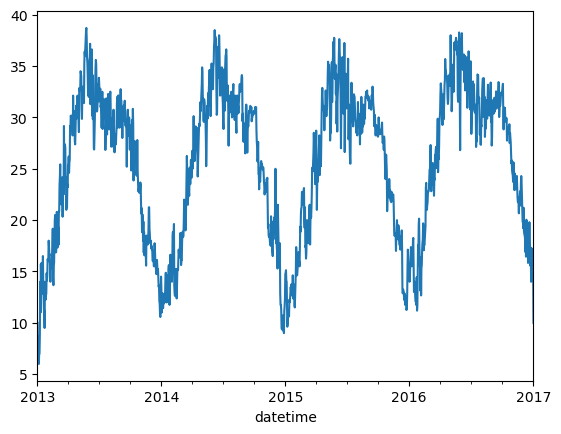

In [7]:
# simple plot
ax = ts.plot();

### Figure Sizes for Time Series
- In general, when we are visualizing time series, we usually want a wider and shorter plot than we typically use.

- To see what is the default figsize used by matplotlib, we can check the values stored in the "rcParams" dictionary in pyplot.

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

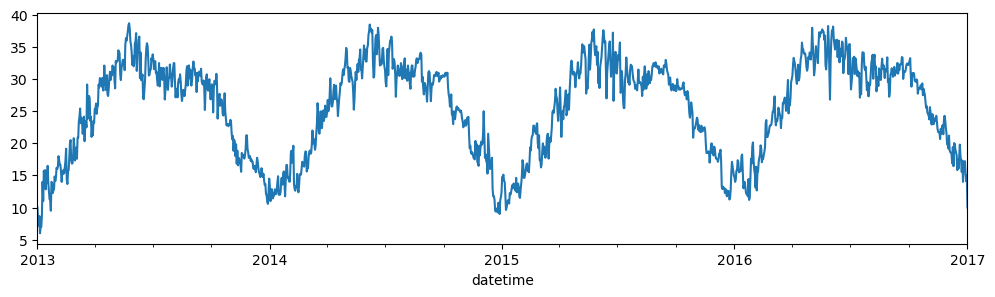

In [9]:
# try sth wider and shorter 
## plot a 12x3 figure
ts.plot(figsize=(12,3));

In [10]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

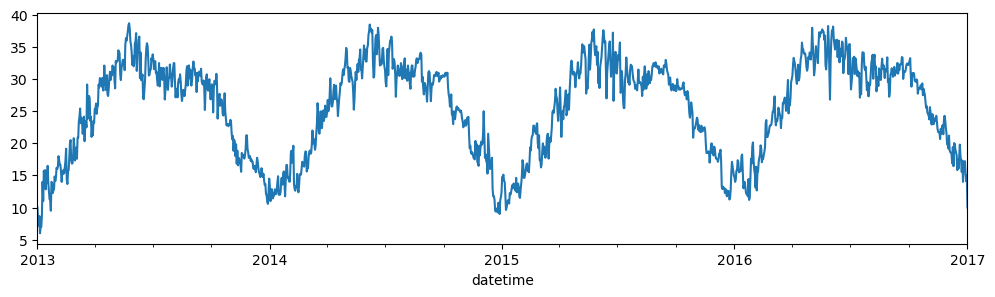

In [11]:
ax = ts.plot();

### Plot - Style/ Level of Detail
If we just want to visualize the dates without the connecting lines, we can add style='.'

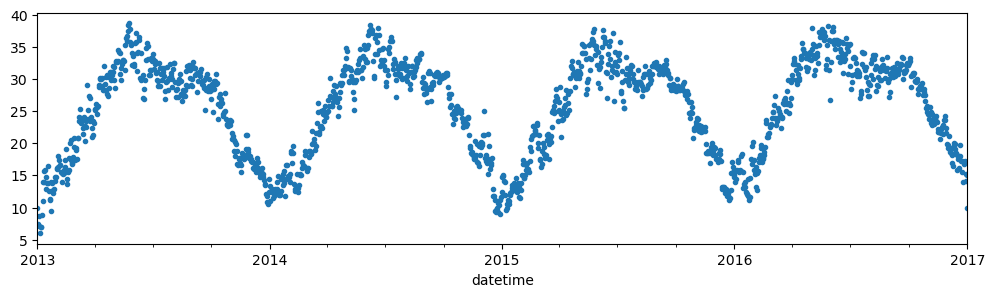

In [12]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');

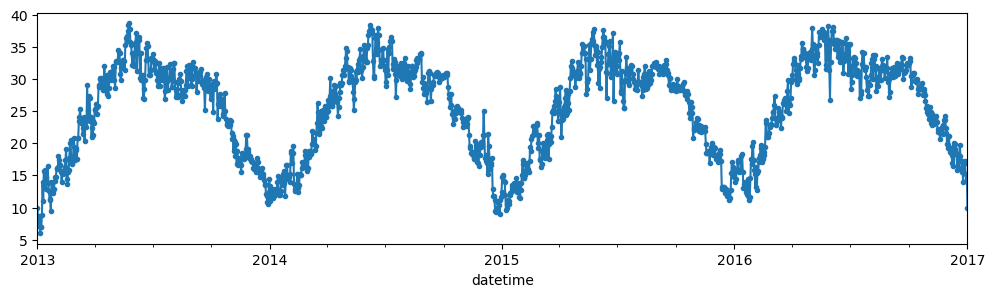

In [13]:
## Using style to add markers
ax = ts.plot(style='.-')

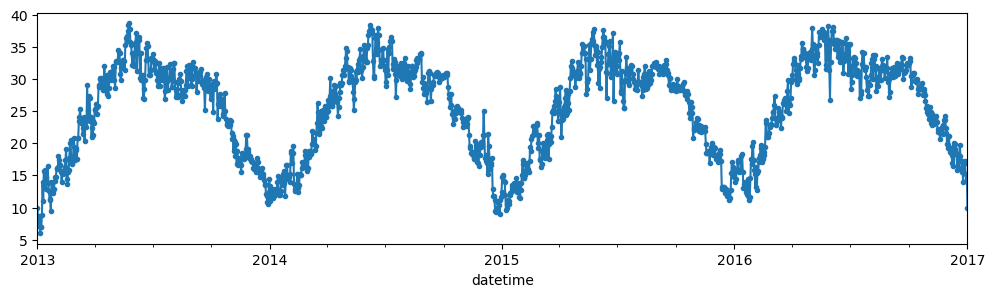

In [14]:
## Using marker to add markers
ax = ts.plot(marker='.')

## Matplotlib Artists

In [15]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

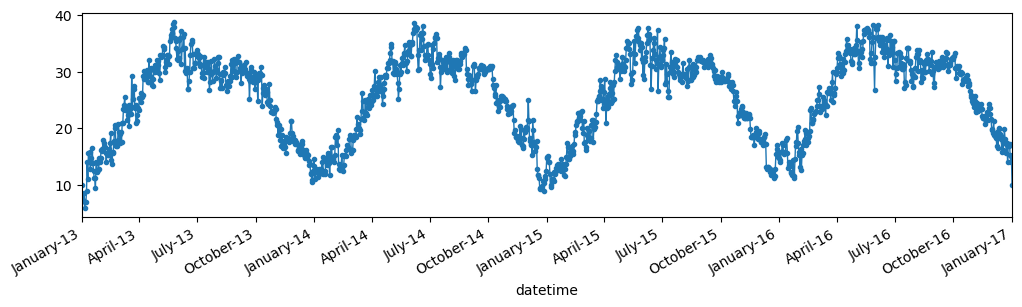

In [16]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")

## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)

##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()

### Customizing Our Ticks (advanced)


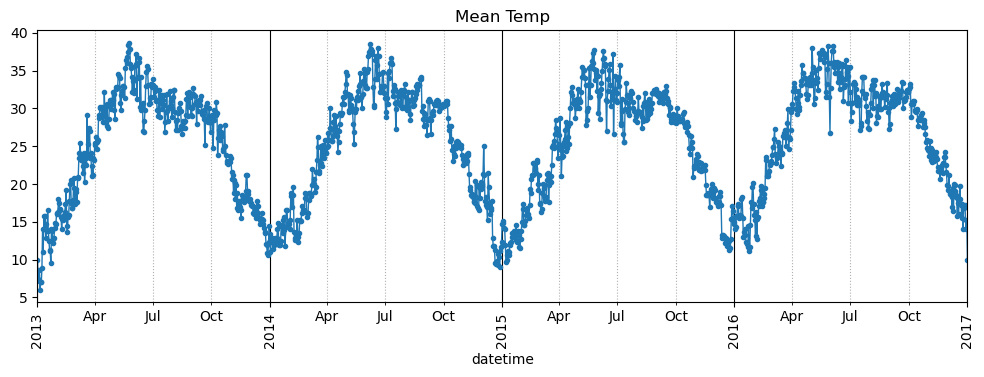

In [17]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

### Additional Customizations

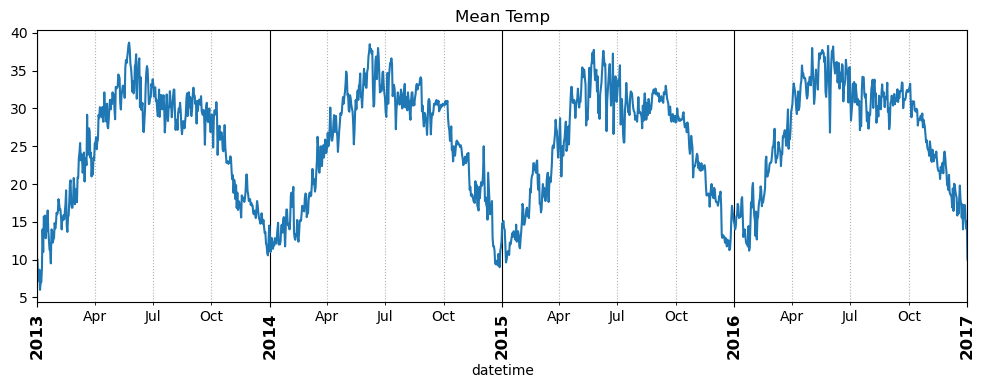

In [18]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Creating a Function for your Code


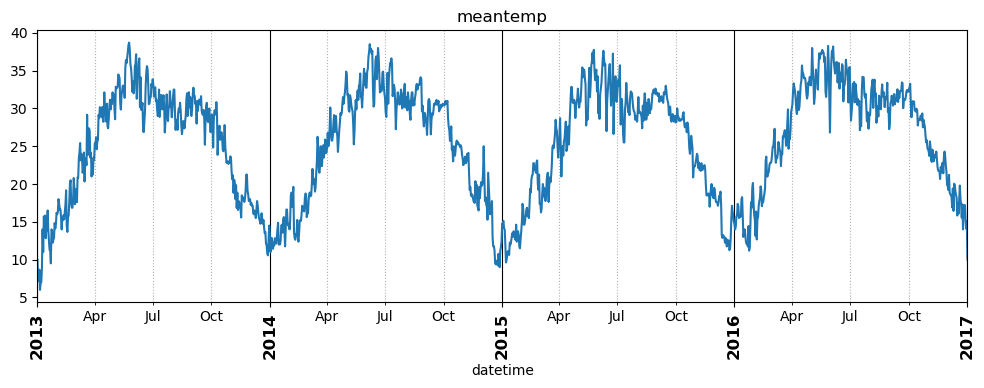

In [19]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

## simplify resizing text

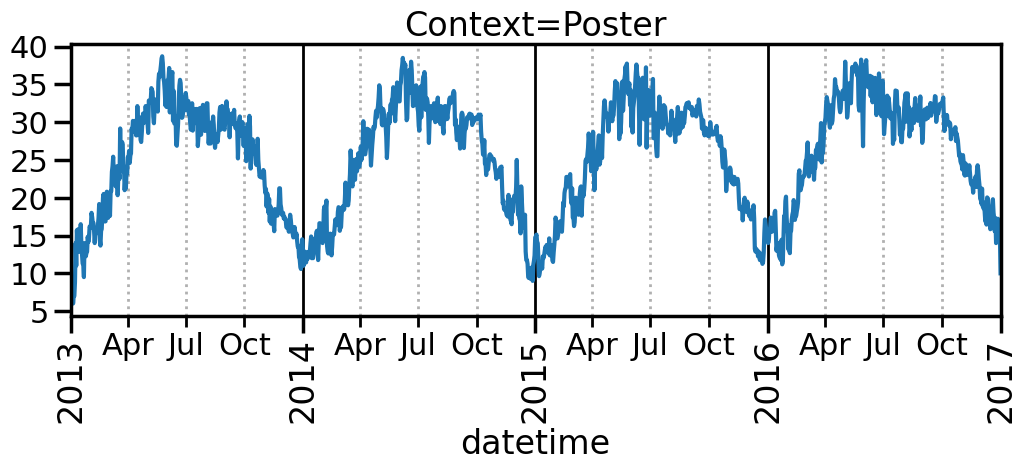

In [20]:
import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

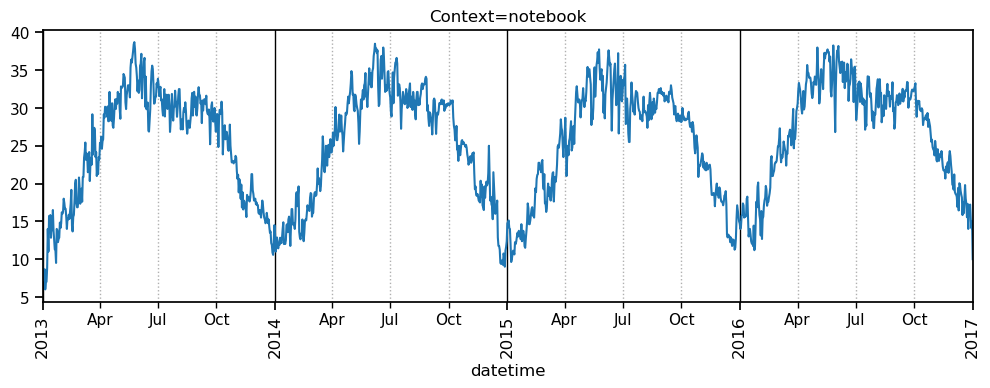

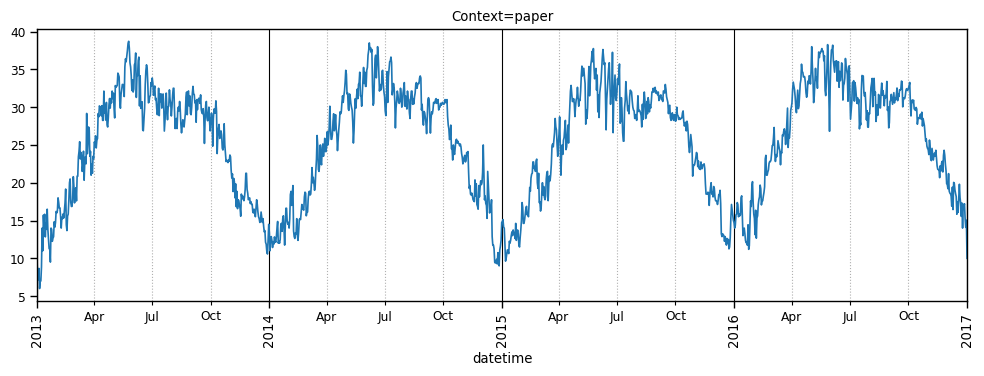

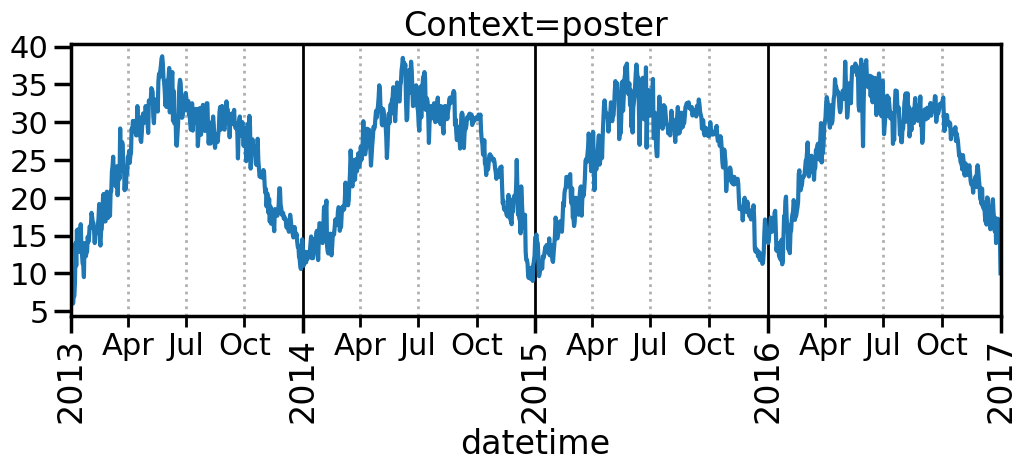

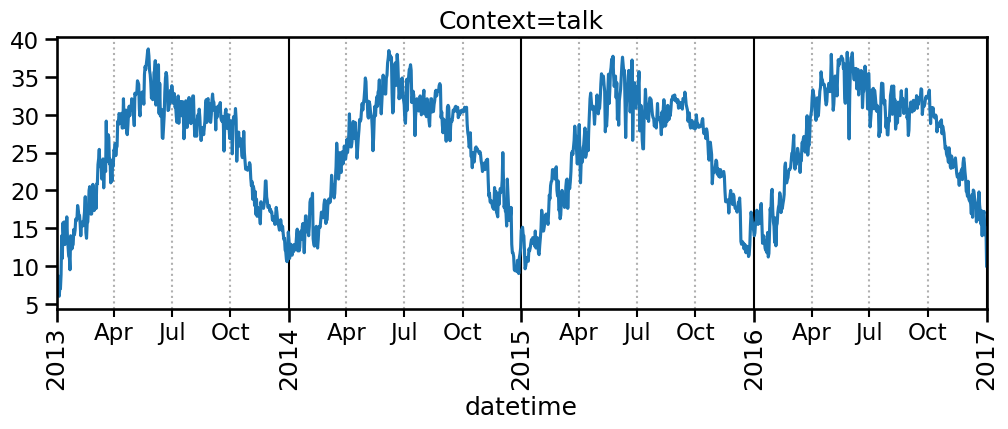

In [21]:
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

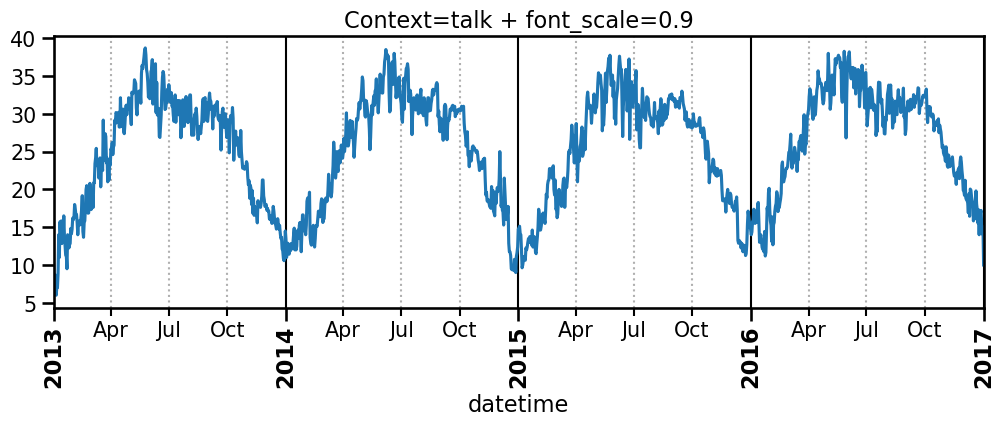

In [22]:
#  let's try using "talk" but also scaling the font a little smaller.

with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

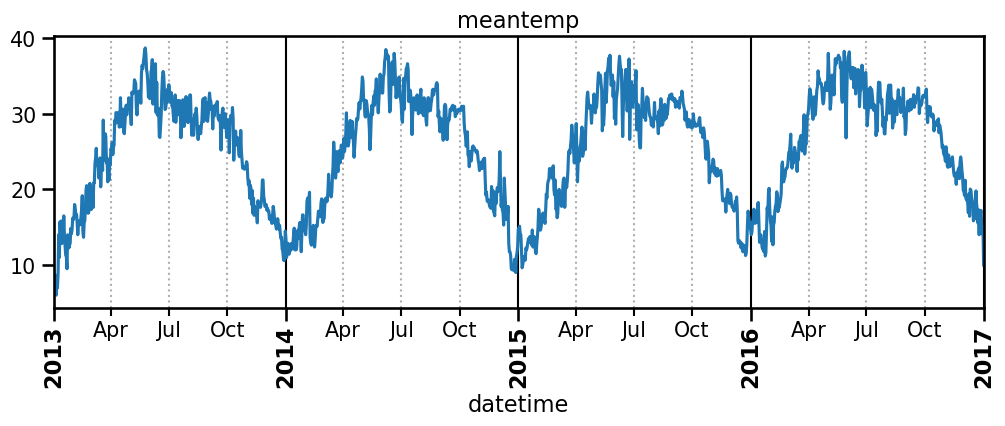

In [23]:
#Using sns.set_context
## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

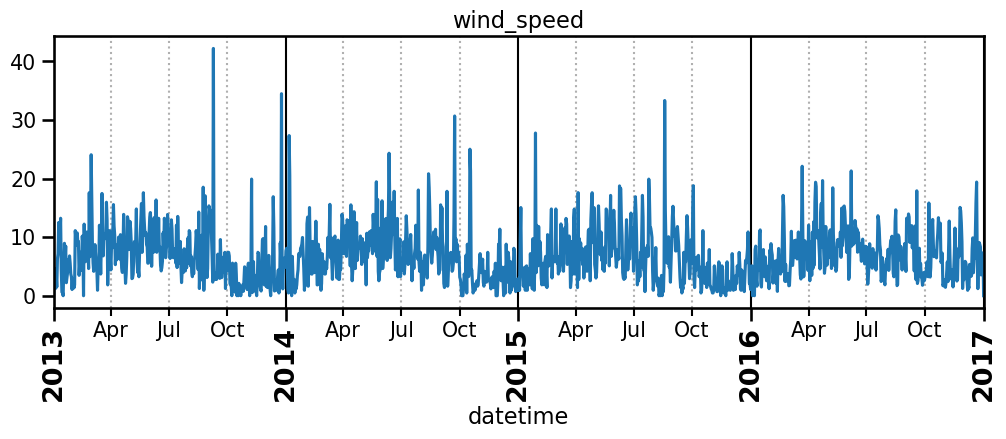

In [24]:
##  Visualize wind_speed instead of meantemp
ts = df['wind_speed'].copy()
plot_dates(ts);

## Converting Time Series Frequencies - the Right Way


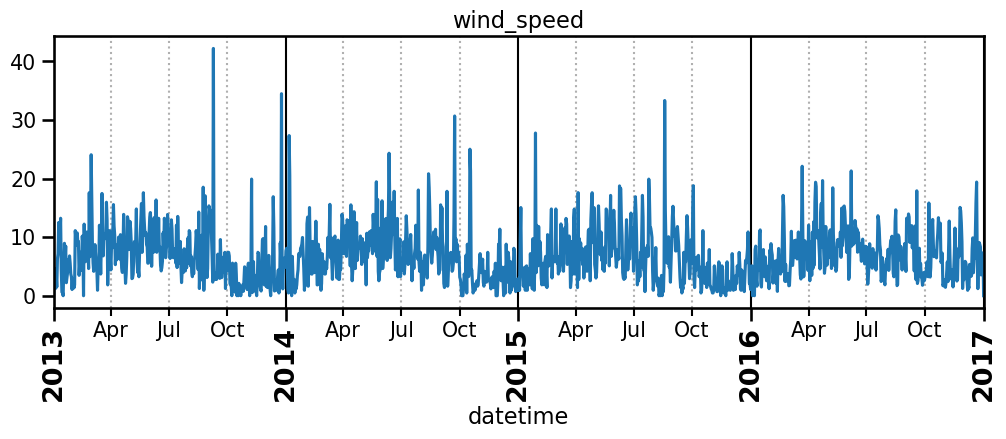

In [25]:
ts = df['wind_speed'].copy()
plot_dates(ts);

In [26]:
#heck index to get more info
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

- We can see in the display above that our index is indeed a DatetimeIndex (with a dtype of datetime64[ns]), but notice that it says "freq=None" in the last line of the output.

- Right now, we have a datetime index with a measurement for each day, but Panda's doesn't know that it should be automatically treated as a "daily" frequency time series.

- Once a time series has a frequency, it MUST have a value for every single time step in that frequency (so for every day if converting to daily, every hour if converting to hourly, etc.)

## Setting the Frequency

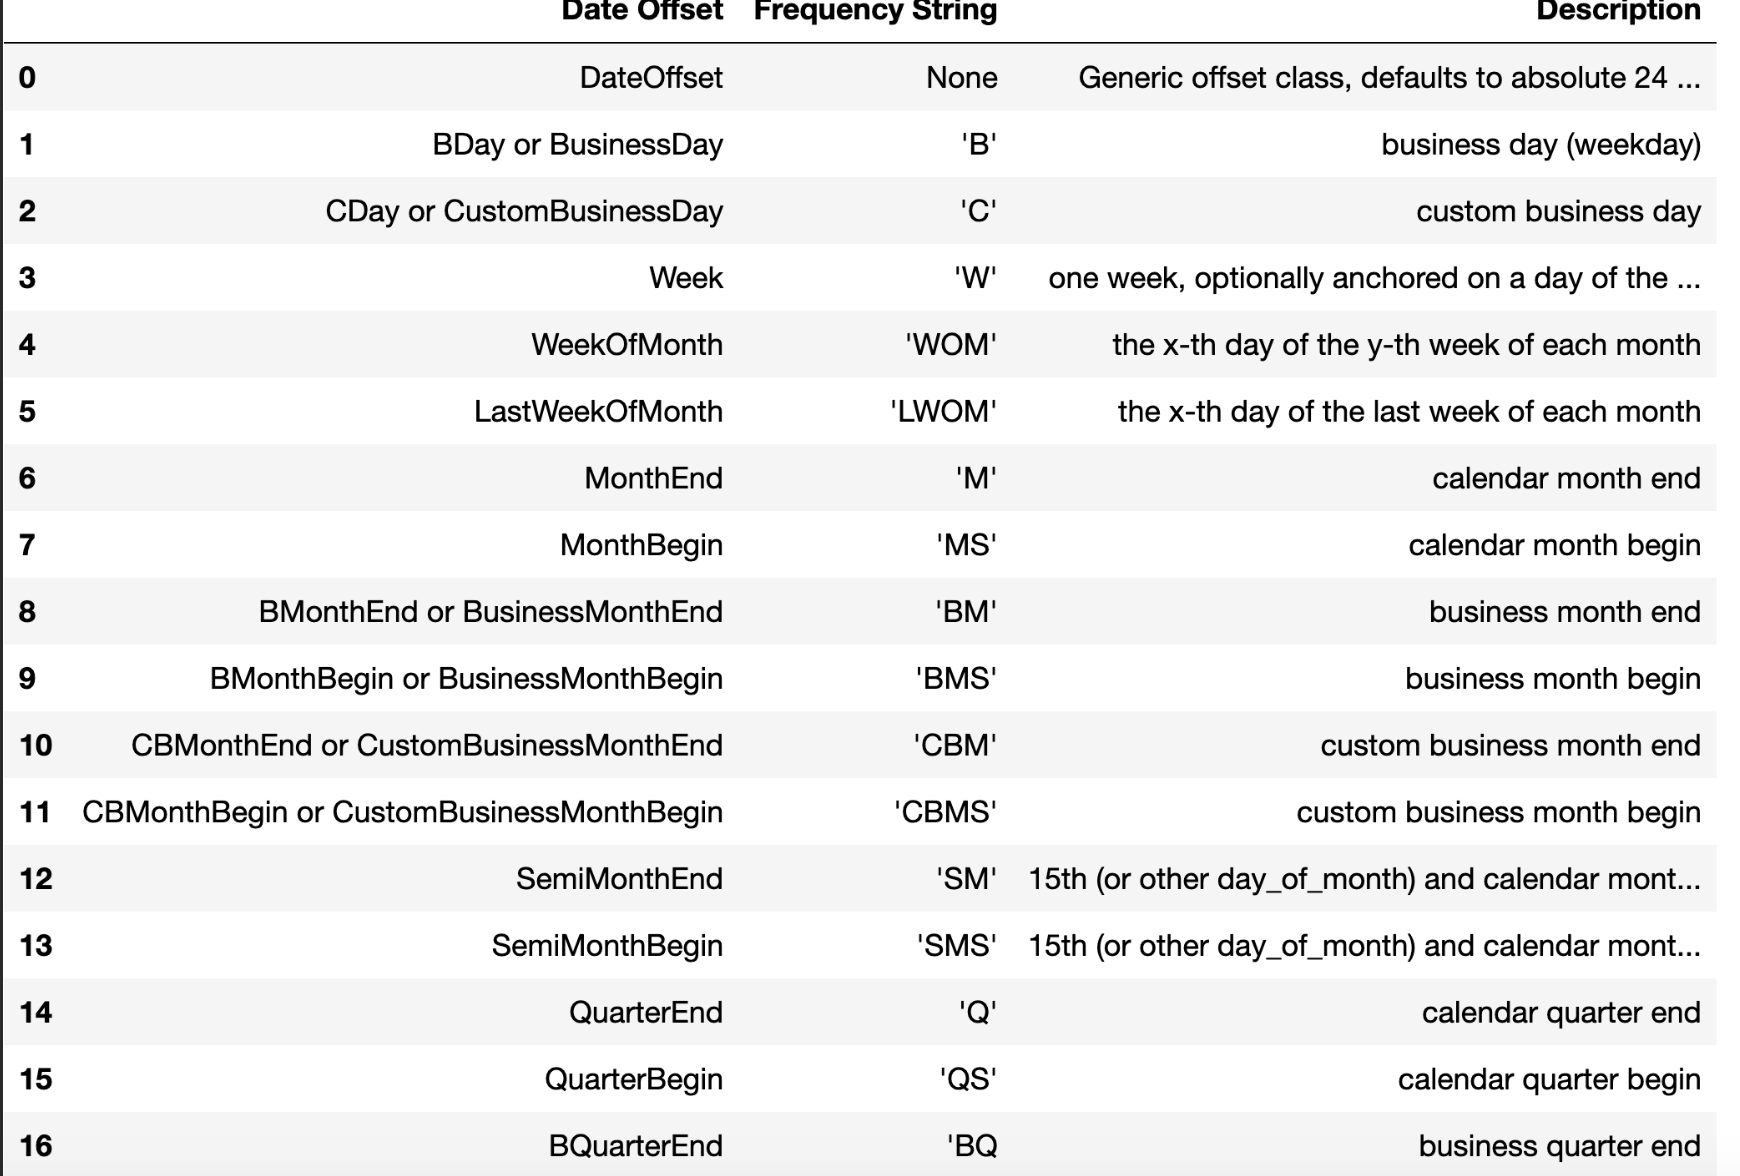

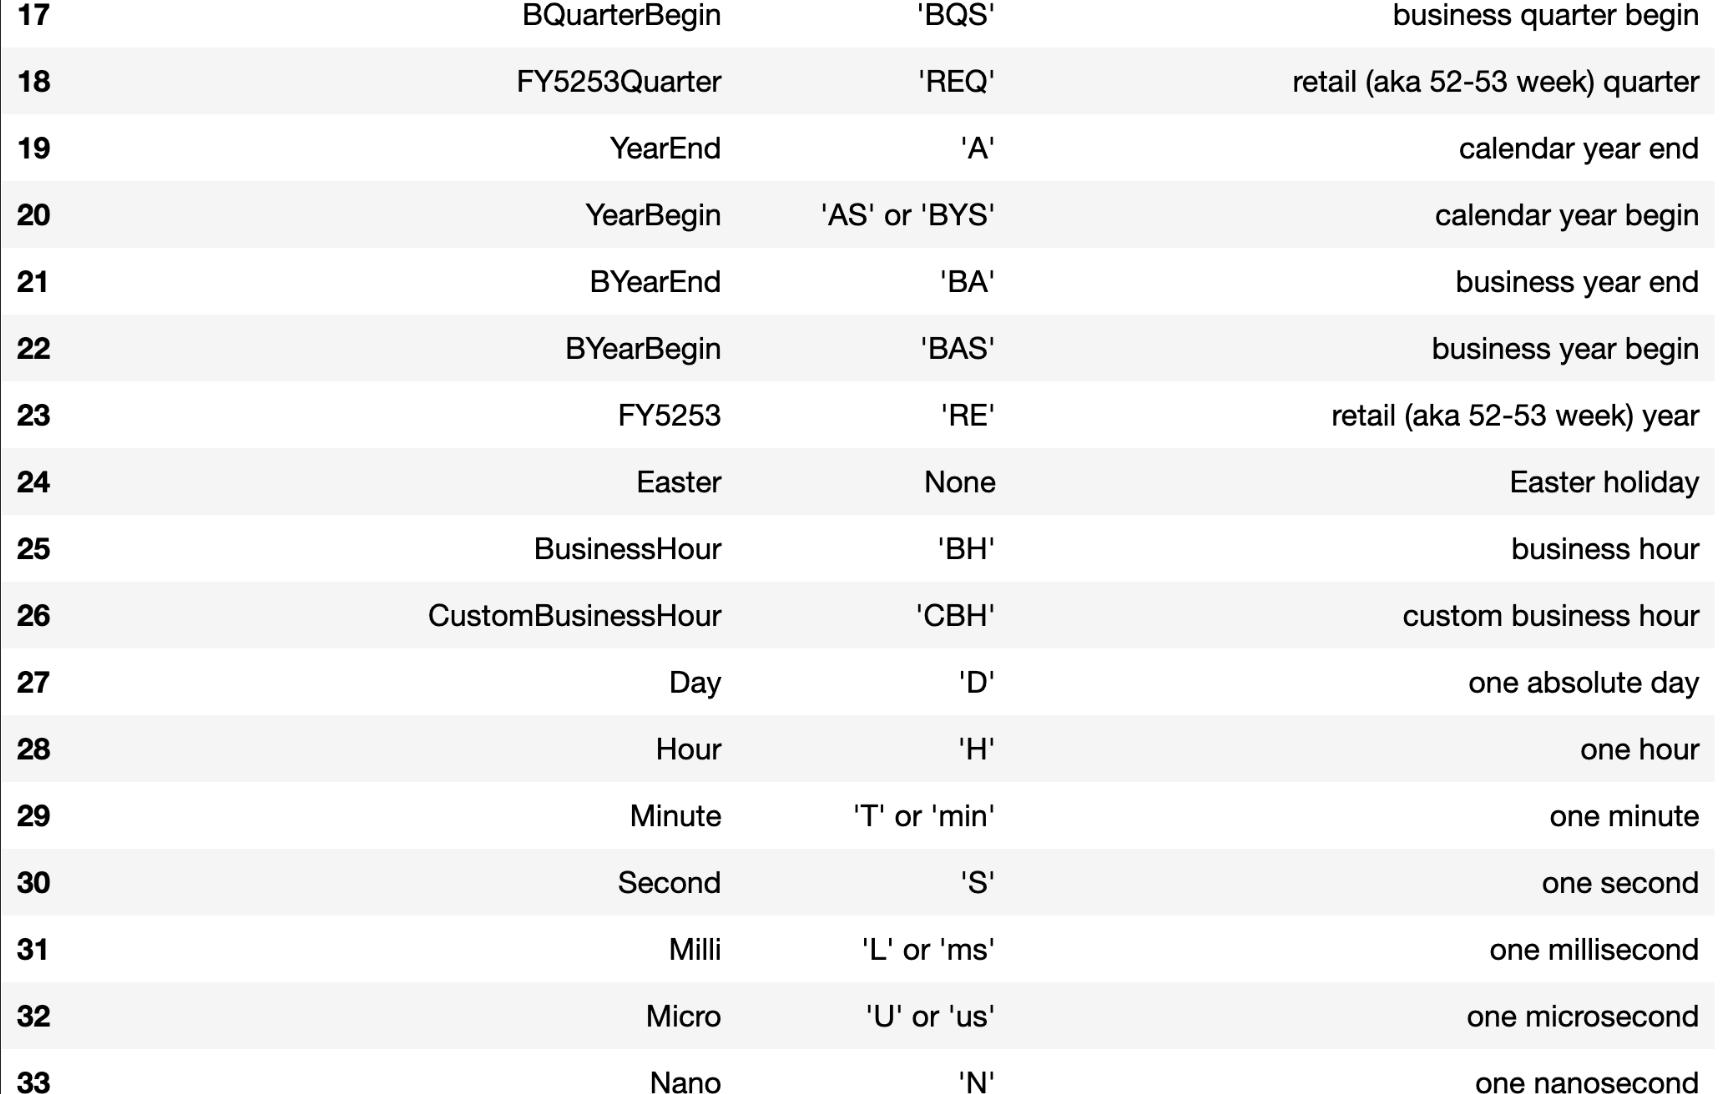

In [27]:
##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

In [28]:
#  remake ts
ts = df['wind_speed'].copy()

##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H

# When we try to set the frequency to a more frequent one (e.g. daily to hourly) 
# it creates many null values. This makes sense because there is simply no data 
# to correspond to that higher frequency.

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    0.0
Freq: H, Name: wind_speed, Length: 35065, dtype: float64

could we set our frequency to a less frequent one? try oversampling and downsampling

## Downsampling

In [29]:
#downsample our daily data to Month-Start frequency ("MS") 
## and take the average monthly wind speed.
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

datetime
2013-01-01    4.833913
2013-02-01    7.474090
2013-03-01    8.757270
2013-04-01    8.046385
2013-05-01    8.943452
Freq: MS, Name: Resampled, dtype: float64

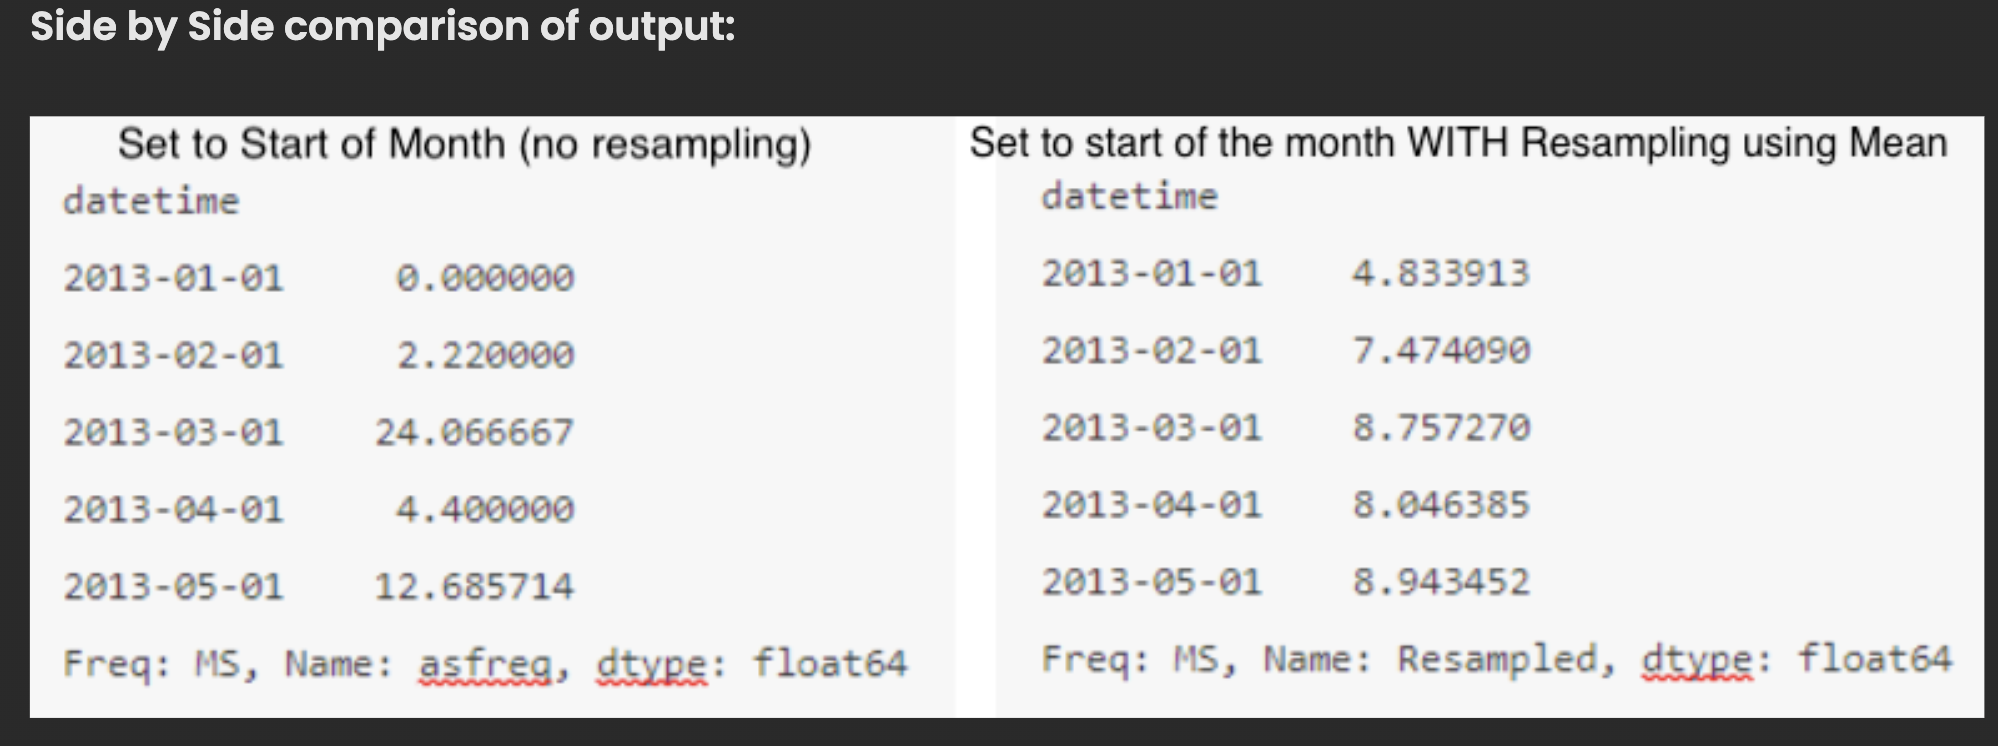

NameError: name 'ts_MS' is not defined

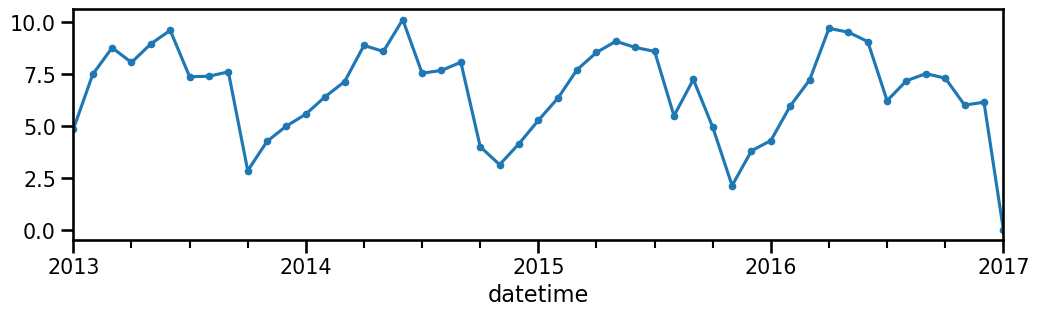

In [30]:
# plot of unsample and resample 
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();

In [31]:
# Use .agg() to Resample
df_ts = df.drop(columns=['date'])
agg_dictionary = {'meantemp':'mean', 'humidity':'max', 'wind_speed':'max','meanpressure':'mean'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W

,meantemp,humidity,wind_speed,meanpressure
datetime,,,,
2013-01-06,7.705556,92.000000,4.633333,1017.300000
2013-01-13,12.343537,78.600000,13.228571,1016.632653
2013-01-20,13.642857,92.166667,8.950000,1017.139456
2013-01-27,12.329592,79.666667,6.800000,1020.337075
2013-02-03,15.736905,77.571429,3.700000,1017.020578
...,...,...,...,...
2016-12-04,20.428841,84.000000,9.185714,873.901783
2016-12-11,18.318229,82.833333,5.355556,1015.619483
2016-12-18,17.871140,64.541667,9.879167,1016.727185


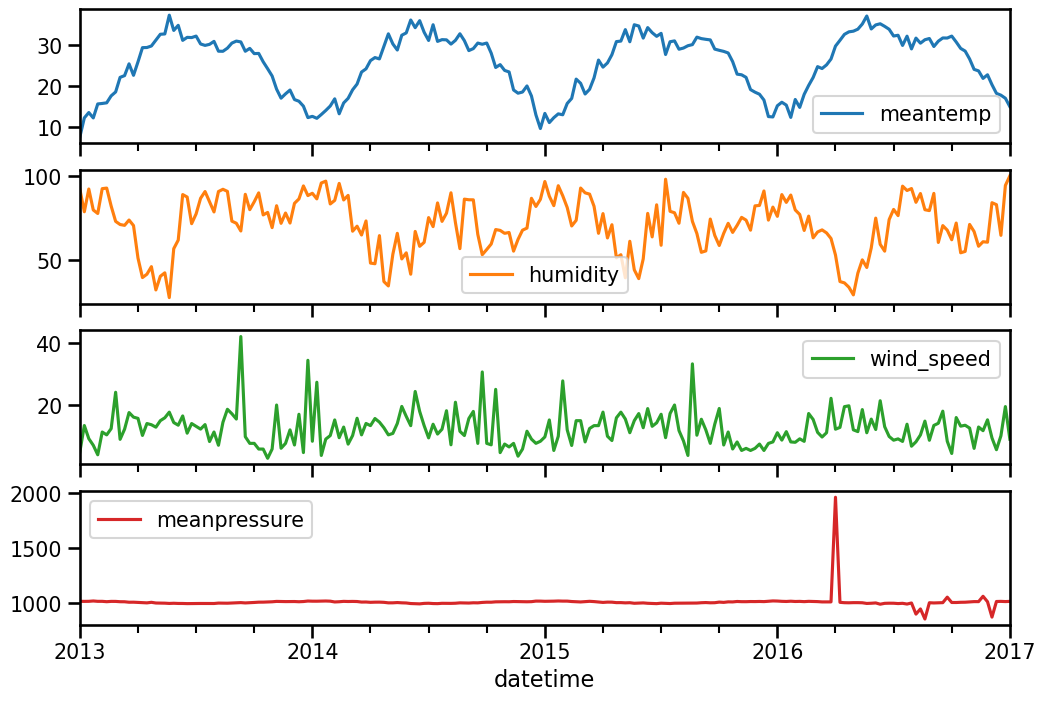

In [32]:
df_W.plot(figsize=(12,8),subplots=True);

## Upsampling

In [33]:
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

<AxesSubplot: xlabel='datetime'>

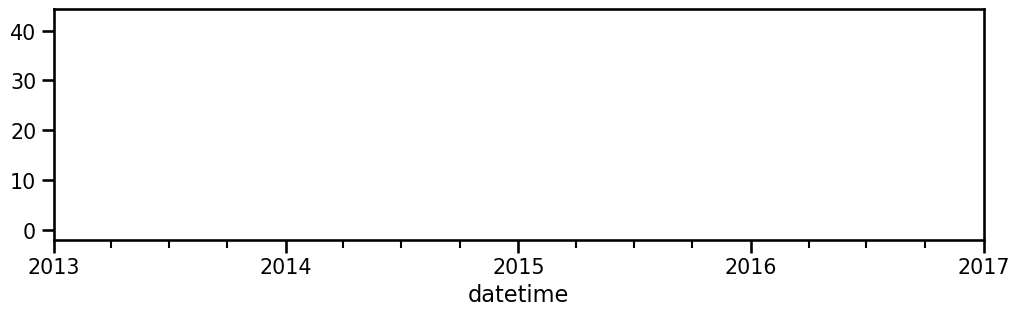

In [34]:
ts_H.plot()
#Recall that when we upsample, we are trying to add more data points...
#But the data is not available!

## Handling Null Values


In [35]:
ts = df['wind_speed'].copy()
ts.head()

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
Name: wind_speed, dtype: float64

In [36]:
#ook at the data based on the days of the week:
day_of_week = ts.index.day_name()
day_of_week.value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Saturday     209
Sunday       209
Monday       208
Name: datetime, dtype: int64

In [37]:
## eliminate all of the weekend days to simulate the missing values.

##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Monday       208
Name: datetime, dtype: int64